### Description

- Using LSTM we will predict next word in a sentence just like how mobile's keyboard does it.
- I have two data sets (decription of a DS course and eposide 1 of Friends SITCOM). I have trained the model one by one.

In [ ]:
faqs = """About the Program
What is the course fee for  Data Science Mentorship Program (DSMP 2023)
The course follows a monthly subscription model where you have to make monthly payments of Rs 799/month.
What is the total duration of the course?
The total duration of the course is 7 months. So the total course fee becomes 799*7 = Rs 5600(approx.)
What is the syllabus of the mentorship program?
We will be covering the following modules:
Python Fundamentals
Python libraries for Data Science
Data Analysis
SQL for Data Science
Maths for Machine Learning
ML Algorithms
Practical ML
MLOPs
Case studies
You can check the detailed syllabus here - https://learnwith.campusx.in/courses/CampusX-Data-Science-Mentorship-Program-637339afe4b0615a1bbed390
Will Deep Learning and NLP be a part of this program?
No, NLP and Deep Learning both are not a part of this program’s curriculum.
What if I miss a live session? Will I get a recording of the session?
Yes all our sessions are recorded, so even if you miss a session you can go back and watch the recording.
Where can I find the class schedule?
Checkout this google sheet to see month by month time table of the course - https://docs.google.com/spreadsheets/d/16OoTax_A6ORAeCg4emgexhqqPv3noQPYKU7RJ6ArOzk/edit?usp=sharing.
What is the time duration of all the live sessions?
Roughly, all the sessions last 2 hours.
What is the language spoken by the instructor during the sessions?
Hinglish
How will I be informed about the upcoming class?
You will get a mail from our side before every paid session once you become a paid user.
Can I do this course if I am from a non-tech background?
Yes, absolutely.
I am late, can I join the program in the middle?
Absolutely, you can join the program anytime.
If I join/pay in the middle, will I be able to see all the past lectures?
Yes, once you make the payment you will be able to see all the past content in your dashboard.
Where do I have to submit the task?
You don’t have to submit the task. We will provide you with the solutions, you have to self evaluate the task yourself.
Will we do case studies in the program?
Yes.
Where can we contact you?
You can mail us at nitish.campusx@gmail.com
Payment/Registration related questions
Where do we have to make our payments? Your YouTube channel or website?
You have to make all your monthly payments on our website. Here is the link for our website - https://learnwith.campusx.in/
Can we pay the entire amount of Rs 5600 all at once?
Unfortunately no, the program follows a monthly subscription model.
What is the validity of monthly subscription? Suppose if I pay on 15th Jan, then do I have to pay again on 1st Feb or 15th Feb
15th Feb. The validity period is 30 days from the day you make the payment. So essentially you can join anytime you don’t have to wait for a month to end.
What if I don’t like the course after making the payment. What is the refund policy?
You get a 7 days refund period from the day you have made the payment.
I am living outside India and I am not able to make the payment on the website, what should I do?
You have to contact us by sending a mail at nitish.campusx@gmail.com
Post registration queries
Till when can I view the paid videos on the website?
This one is tricky, so read carefully. You can watch the videos till your subscription is valid. Suppose you have purchased subscription on 21st Jan, you will be able to watch all the past paid sessions in the period of 21st Jan to 20th Feb. But after 21st Feb you will have to purchase the subscription again.
But once the course is over and you have paid us Rs 5600(or 7 installments of Rs 799) you will be able to watch the paid sessions till Aug 2024.
Why lifetime validity is not provided?
Because of the low course fee.
Where can I reach out in case of a doubt after the session?
You will have to fill a google form provided in your dashboard and our team will contact you for a 1 on 1 doubt clearance session
If I join the program late, can I still ask past week doubts?
Yes, just select past week doubt in the doubt clearance google form.
I am living outside India and I am not able to make the payment on the website, what should I do?
You have to contact us by sending a mail at nitish.campusx@gmai.com
Certificate and Placement Assistance related queries
What is the criteria to get the certificate?
There are 2 criterias:
You have to pay the entire fee of Rs 5600
You have to attempt all the course assessments.
I am joining late. How can I pay payment of the earlier months?
You will get a link to pay fee of earlier months in your dashboard once you pay for the current month.
I have read that Placement assistance is a part of this program. What comes under Placement assistance?
This is to clarify that Placement assistance does not mean Placement guarantee. So we dont guarantee you any jobs or for that matter even interview calls. So if you are planning to join this course just for placements, I am afraid you will be disappointed. Here is what comes under placement assistance
Portfolio Building sessions
Soft skill sessions
Sessions with industry mentors
Discussion on Job hunting strategies
"""

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential, Model
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer()  #creating instance/object of Tokenizer class
tokenizer.fit_on_texts([faqs])

In [ ]:
tokenizer.word_index #return dictionary with keys as words and values as values of respective words

{'the': 1,
 'you': 2,
 'i': 3,
 'to': 4,
 'a': 5,
 'of': 6,
 'is': 7,
 'have': 8,
 'will': 9,
 'can': 10,
 'what': 11,
 'course': 12,
 'program': 13,
 'in': 14,
 'for': 15,
 'all': 16,
 'sessions': 17,
 'on': 18,
 'be': 19,
 'and': 20,
 'this': 21,
 'if': 22,
 'am': 23,
 'pay': 24,
 'payment': 25,
 'make': 26,
 'we': 27,
 'do': 28,
 'subscription': 29,
 'where': 30,
 'rs': 31,
 'so': 32,
 'campusx': 33,
 'session': 34,
 'our': 35,
 'paid': 36,
 'join': 37,
 'able': 38,
 'your': 39,
 'website': 40,
 'placement': 41,
 'fee': 42,
 'data': 43,
 'monthly': 44,
 'month': 45,
 'not': 46,
 'get': 47,
 'yes': 48,
 'once': 49,
 'past': 50,
 'feb': 51,
 'assistance': 52,
 'science': 53,
 '7': 54,
 '5600': 55,
 'are': 56,
 'watch': 57,
 'google': 58,
 'by': 59,
 'com': 60,
 'mail': 61,
 'from': 62,
 'contact': 63,
 'us': 64,
 'at': 65,
 'or': 66,
 'doubt': 67,
 'mentorship': 68,
 'payments': 69,
 '799': 70,
 'total': 71,
 'duration': 72,
 'months': 73,
 'learning': 74,
 'case': 75,
 'here': 76,
 '

In [ ]:
#tokenize sentence by sentence

input_sequences = []
for sent in faqs.split('\n'): #each new line represent new sentence
  tokenize_sent = tokenizer.texts_to_sequences([sent])[0]

  for i in range(1, len(tokenize_sent)):
    input_sequences.append(tokenize_sent[:i+1])


In [ ]:
input_sequences

[[93, 1],
 [93, 1, 13],
 [11, 7],
 [11, 7, 1],
 [11, 7, 1, 12],
 [11, 7, 1, 12, 42],
 [11, 7, 1, 12, 42, 15],
 [11, 7, 1, 12, 42, 15, 43],
 [11, 7, 1, 12, 42, 15, 43, 53],
 [11, 7, 1, 12, 42, 15, 43, 53, 68],
 [11, 7, 1, 12, 42, 15, 43, 53, 68, 13],
 [11, 7, 1, 12, 42, 15, 43, 53, 68, 13, 147],
 [11, 7, 1, 12, 42, 15, 43, 53, 68, 13, 147, 148],
 [1, 12],
 [1, 12, 94],
 [1, 12, 94, 5],
 [1, 12, 94, 5, 44],
 [1, 12, 94, 5, 44, 29],
 [1, 12, 94, 5, 44, 29, 95],
 [1, 12, 94, 5, 44, 29, 95, 30],
 [1, 12, 94, 5, 44, 29, 95, 30, 2],
 [1, 12, 94, 5, 44, 29, 95, 30, 2, 8],
 [1, 12, 94, 5, 44, 29, 95, 30, 2, 8, 4],
 [1, 12, 94, 5, 44, 29, 95, 30, 2, 8, 4, 26],
 [1, 12, 94, 5, 44, 29, 95, 30, 2, 8, 4, 26, 44],
 [1, 12, 94, 5, 44, 29, 95, 30, 2, 8, 4, 26, 44, 69],
 [1, 12, 94, 5, 44, 29, 95, 30, 2, 8, 4, 26, 44, 69, 6],
 [1, 12, 94, 5, 44, 29, 95, 30, 2, 8, 4, 26, 44, 69, 6, 31],
 [1, 12, 94, 5, 44, 29, 95, 30, 2, 8, 4, 26, 44, 69, 6, 31, 70],
 [1, 12, 94, 5, 44, 29, 95, 30, 2, 8, 4, 26, 44, 69, 6

In [ ]:
each_sent_len = []
for i in input_sequences:
  each_sent_len.append(len(i))

In [ ]:
max(each_sent_len)

57

In [ ]:
max_len = max([len(i) for i in input_sequences])

In [ ]:
padded_sequences = pad_sequences(input_sequences, maxlen=max_len, padding='pre')

In [ ]:
X = padded_sequences[:, :-1]
y = padded_sequences[:, -1]

In [ ]:
X

array([[  0,   0,   0, ...,   0,   0,  93],
       [  0,   0,   0, ...,   0,  93,   1],
       [  0,   0,   0, ...,   0,   0,  11],
       ...,
       [  0,   0,   0, ...,   0, 279,  18],
       [  0,   0,   0, ..., 279,  18, 280],
       [  0,   0,   0, ...,  18, 280, 281]], dtype=int32)

In [ ]:
y

array([  1,  13,   7,   1,  12,  42,  15,  43,  53,  68,  13, 147, 148,
        12,  94,   5,  44,  29,  95,  30,   2,   8,   4,  26,  44,  69,
         6,  31,  70,  45,   7,   1,  71,  72,   6,   1,  12,  71,  72,
         6,   1,  12,   7,  54,  73,  32,   1,  71,  12,  42, 149,  70,
        54,  31,  55, 150,   7,   1,  96,   6,   1,  68,  13,   9,  19,
       151,   1, 152, 153, 154, 155,  15,  43,  53, 156,  15,  43,  53,
        15, 159,  74, 160,  98,  99,  10, 163,   1, 164,  96,  76,  77,
       100,  33,  14, 165,  33,  43,  53,  68,  13, 166, 101,  74,  20,
       102,  19,   5,  78,   6,  21,  13, 102,  20, 101,  74, 167,  56,
        46,   5,  78,   6,  21, 168, 169,  22,   3, 104,   5, 105,  34,
         9,   3,  47,   5, 106,   6,   1,  34,  16,  35,  17,  56, 170,
        32, 107,  22,   2, 104,   5,  34,   2,  10, 171, 172,  20,  57,
         1, 106,  10,   3, 173,   1, 108, 174,  21,  58, 176,   4,  79,
        45,  59,  45, 109, 177,   6,   1,  12,  77, 178,  58,  6

In [ ]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y,num_classes=283)

In [ ]:
y[2]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense
from tensorflow.keras.models import Sequential

In [ ]:
4*(100*150+150*150+150)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=1018, output_dim=100, input_length=max_len-1))
model.add(LSTM(250))
model.add(Dense(1018, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=283, output_dim=100, input_length=56)) #trainable paramaters (283*100)
model.add(LSTM(150)) #4*(100*150+150*150+150) Total_Parameters=4*(input_dim*units+units*units+units)
model.add(Dense(283, activation='softmax')) #(283*150)+283
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 56, 100)           28300     
                                                                 
 lstm_1 (LSTM)               (None, 150)               150600    
                                                                 
 dense_1 (Dense)             (None, 283)               42733     
                                                                 
Total params: 221633 (865.75 KB)
Trainable params: 221633 (865.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


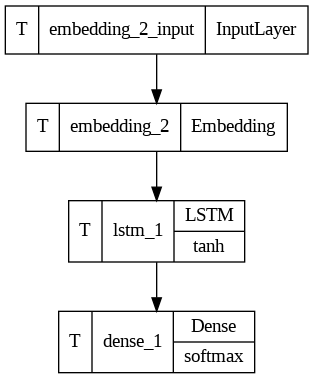

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_layer_activations=True, show_trainable=True)

In [ ]:
model.fit(X,y,epochs=100)

Epoch 1/100
27/27 [==============================] - 6s 105ms/step - loss: 5.4534 - accuracy: 0.0660
Epoch 2/100
27/27 [==============================] - 3s 102ms/step - loss: 5.0965 - accuracy: 0.0776
Epoch 3/100
27/27 [==============================] - 3s 118ms/step - loss: 5.0225 - accuracy: 0.0776
Epoch 4/100
27/27 [==============================] - 4s 156ms/step - loss: 4.9867 - accuracy: 0.0776
Epoch 5/100
27/27 [==============================] - 3s 104ms/step - loss: 4.9415 - accuracy: 0.0776
Epoch 6/100
27/27 [==============================] - 3s 104ms/step - loss: 4.8499 - accuracy: 0.0927
Epoch 7/100
27/27 [==============================] - 3s 103ms/step - loss: 4.7095 - accuracy: 0.1008
Epoch 8/100
27/27 [==============================] - 5s 175ms/step - loss: 4.4993 - accuracy: 0.1402
Epoch 9/100
27/27 [==============================] - 3s 103ms/step - loss: 4.2409 - accuracy: 0.1727
Epoch 10/100
27/27 [==============================] - 3s 104ms/step - loss: 3.9791 - accura

In [ ]:
text = "How much time"
for i in range(10):
  token_text = tokenizer.texts_to_sequences([text])[0]
  padded_text = pad_sequences([token_text], maxlen=max_len, padding='pre')
    # predict
  pos = np.argmax(model.predict(padded_text))

  for word,index in tokenizer.word_index.items():
    if index == pos:
      text = text + " " + word
      print(text)


1/1 [==============================] - 0s 71ms/step
How much time when
1/1 [==============================] - 0s 77ms/step
How much time when can
1/1 [==============================] - 0s 55ms/step
How much time when can i
1/1 [==============================] - 0s 63ms/step
How much time when can i view
1/1 [==============================] - 0s 144ms/step
How much time when can i view the
1/1 [==============================] - 0s 121ms/step
How much time when can i view the paid
1/1 [==============================] - 0s 119ms/step
How much time when can i view the paid videos
1/1 [==============================] - 0s 130ms/step
How much time when can i view the paid videos on
1/1 [==============================] - 0s 105ms/step
How much time when can i view the paid videos on the
1/1 [==============================] - 0s 99ms/step
How much time when can i view the paid videos on the website


In [51]:
sample_text = "How"
token_text = tokenizer.texts_to_sequences([sample_text])[0]
padded_text = pad_sequences([token_text], maxlen=max_len, padding='pre')
print(token_text)
print(padded_text)

[111]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 111]]


In [ ]:
text = "what is the fee"

for i in range(10):
  # tokenize
  token_text = tokenizer.texts_to_sequences([text])[0]
  # padding
  padded_token_text = pad_sequences([token_text], maxlen=56, padding='pre')
  # predict
  pos = np.argmax(model.predict(padded_token_text))

  for word,index in tokenizer.word_index.items():
    if index == pos:
      text = text + " " + word
      print(text)

In [60]:
sample_text = "How"

for i in range(10):

  token_text = tokenizer.texts_to_sequences([sample_text])[0]
  padded_text = pad_sequences([token_text], maxlen=max_len, padding='pre')
  pos = np.argmax(model.predict(padded_text))

  for key, value in tokenizer.word_index.items():
    if value == pos:
      sample_text = sample_text + " " + key
      print(sample_text)

1/1 [==============================] - 0s 57ms/step
How will
1/1 [==============================] - 0s 65ms/step
How will i
1/1 [==============================] - 0s 56ms/step
How will i be
1/1 [==============================] - 0s 52ms/step
How will i be informed
1/1 [==============================] - 0s 62ms/step
How will i be informed about
1/1 [==============================] - 0s 59ms/step
How will i be informed about the
1/1 [==============================] - 0s 99ms/step
How will i be informed about the upcoming
1/1 [==============================] - 0s 59ms/step
How will i be informed about the upcoming class
1/1 [==============================] - 0s 77ms/step
How will i be informed about the upcoming class class
1/1 [==============================] - 0s 58ms/step
How will i be informed about the upcoming class class learnwith


In [52]:
sample_text = "How"
token_text = tokenizer.texts_to_sequences([sample_text])[0]
padded_text = pad_sequences([token_text], maxlen=max_len, padding='pre')
np.argmax(model.predict(padded_text))

1/1 [==============================] - 0s 81ms/step


9

In [47]:
sample_text = "the"
token_text = tokenizer.texts_to_sequences([sample_text])[0]
padded_text = pad_sequences([token_text], maxlen=max_len, padding='pre')
padded_text

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int32)

In [48]:
sample_text = "program"
token_text = tokenizer.texts_to_sequences([sample_text])[0]
padded_text = pad_sequences([token_text], maxlen=max_len, padding='pre')
padded_text

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0, 13]], dtype=int32)

In [49]:
sample_text = "about"
token_text = tokenizer.texts_to_sequences([sample_text])[0]
padded_text = pad_sequences([token_text], maxlen=max_len, padding='pre')
padded_text

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0, 93]], dtype=int32)

In [3]:
file_name = '/content/S01E01 Monica Gets A Roommate.txt'
eposide1 = []
with open(file_name, 'r') as f:
  for line in f:
    eposide1.append(line.strip())

In [6]:
cleaned = [line for line in eposide1 if line.strip() != '']
cleaned

['The One Where Monica Gets a New Roommate (The Pilot-The Uncut Version)',
 'Written by: Marta Kauffman & David Crane',
 '[Scene: Central Perk, Chandler, Joey, Phoebe, and Monica are there.]',
 "Monica: There's nothing to tell! He's just some guy I work with!",
 "Joey: C'mon, you're going out with the guy! There's gotta be something wrong with him!",
 'Chandler: All right Joey, be nice.  So does he have a hump? A hump and a hairpiece?',
 'Phoebe: Wait, does he eat chalk?',
 '(They all stare, bemused.)',
 "Phoebe: Just, 'cause, I don't want her to go through what I went through with Carl- oh!",
 "Monica: Okay, everybody relax. This is not even a date. It's just two people going out to dinner and- not having sex.",
 'Chandler: Sounds like a date to me.',
 '[Time Lapse]',
 "Chandler: Alright, so I'm back in high school, I'm standing in the middle of the cafeteria, and I realize I am totally naked.",
 'All: Oh, yeah. Had that dream.',
 "Chandler: Then I look down, and I realize there's a p

In [9]:
document = []
for line in cleaned:
  document.append(line.lower())

In [10]:
document

['the one where monica gets a new roommate (the pilot-the uncut version)',
 'written by: marta kauffman & david crane',
 '[scene: central perk, chandler, joey, phoebe, and monica are there.]',
 "monica: there's nothing to tell! he's just some guy i work with!",
 "joey: c'mon, you're going out with the guy! there's gotta be something wrong with him!",
 'chandler: all right joey, be nice.  so does he have a hump? a hump and a hairpiece?',
 'phoebe: wait, does he eat chalk?',
 '(they all stare, bemused.)',
 "phoebe: just, 'cause, i don't want her to go through what i went through with carl- oh!",
 "monica: okay, everybody relax. this is not even a date. it's just two people going out to dinner and- not having sex.",
 'chandler: sounds like a date to me.',
 '[time lapse]',
 "chandler: alright, so i'm back in high school, i'm standing in the middle of the cafeteria, and i realize i am totally naked.",
 'all: oh, yeah. had that dream.',
 "chandler: then i look down, and i realize there's a p

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [15]:
len(document)

341

In [19]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(document)

In [23]:
tokenizer.word_index

{'i': 1,
 'you': 2,
 'a': 3,
 'and': 4,
 'the': 5,
 'monica': 6,
 'to': 7,
 'rachel': 8,
 'ross': 9,
 'chandler': 10,
 'it': 11,
 'joey': 12,
 'is': 13,
 'that': 14,
 'of': 15,
 'paul': 16,
 'just': 17,
 "i'm": 18,
 'oh': 19,
 'my': 20,
 'on': 21,
 'all': 22,
 'what': 23,
 'me': 24,
 'no': 25,
 'out': 26,
 'her': 27,
 'this': 28,
 'know': 29,
 'was': 30,
 'in': 31,
 'are': 32,
 'with': 33,
 "it's": 34,
 'phoebe': 35,
 'be': 36,
 'so': 37,
 "don't": 38,
 'okay': 39,
 'have': 40,
 'like': 41,
 'for': 42,
 'do': 43,
 'can': 44,
 'cut': 45,
 'she': 46,
 "you're": 47,
 'your': 48,
 'scene': 49,
 'there': 50,
 'if': 51,
 'not': 52,
 'right': 53,
 'go': 54,
 'yeah': 55,
 'get': 56,
 'here': 57,
 "that's": 58,
 'coffee': 59,
 'well': 60,
 'but': 61,
 'guy': 62,
 'he': 63,
 'they': 64,
 'how': 65,
 'la': 66,
 'hey': 67,
 'up': 68,
 'look': 69,
 'or': 70,
 'think': 71,
 'want': 72,
 'had': 73,
 'at': 74,
 'god': 75,
 "can't": 76,
 "there's": 77,
 'down': 78,
 'really': 79,
 'got': 80,
 'sorry': 

In [43]:
vocubalary = len(tokenizer.word_index)
vocubalary

1017

In [28]:
tokenizer.texts_to_sequences(document)

[[5, 83, 125, 6, 298, 3, 174, 441, 5, 442, 5, 443, 444],
 [445, 147, 446, 447, 299, 448],
 [49, 224, 225, 10, 12, 35, 4, 6, 32, 50],
 [6, 77, 226, 7, 175, 148, 17, 84, 62, 1, 126, 33],
 [12, 149, 47, 105, 26, 33, 5, 62, 77, 106, 36, 93, 300, 33, 94],
 [10, 22, 53, 12, 36, 176, 37, 127, 63, 40, 3, 301, 3, 301, 4, 3, 449],
 [35, 107, 127, 63, 450, 451],
 [64, 22, 302, 452],
 [35, 17, 453, 1, 38, 72, 27, 7, 54, 150, 23, 1, 227, 150, 33, 454, 19],
 [6,
  39,
  95,
  455,
  28,
  13,
  52,
  228,
  3,
  96,
  34,
  17,
  151,
  456,
  105,
  26,
  7,
  457,
  4,
  52,
  229,
  230],
 [10, 303, 41, 3, 96, 7, 24],
 [108, 177],
 [10,
  178,
  37,
  18,
  85,
  31,
  231,
  304,
  18,
  458,
  31,
  5,
  459,
  15,
  5,
  460,
  4,
  1,
  305,
  1,
  86,
  461,
  462],
 [22, 19, 55, 73, 14, 179],
 [10, 152, 1, 69, 78, 4, 1, 305, 77, 3, 128, 50],
 [12, 463, 15],
 [10, 58, 53],
 [12, 129, 73, 14, 179],
 [35, 25],
 [10,
  22,
  15,
  3,
  306,
  5,
  128,
  109,
  7,
  464,
  87,
  1,
  38,
  29,


In [30]:
input_sequence = []

for sent in tokenizer.texts_to_sequences(document):
  for i in range(1, len(sent)):
    input_sequence.append(sent[:i+1])

In [31]:
input_sequence

[[5, 83],
 [5, 83, 125],
 [5, 83, 125, 6],
 [5, 83, 125, 6, 298],
 [5, 83, 125, 6, 298, 3],
 [5, 83, 125, 6, 298, 3, 174],
 [5, 83, 125, 6, 298, 3, 174, 441],
 [5, 83, 125, 6, 298, 3, 174, 441, 5],
 [5, 83, 125, 6, 298, 3, 174, 441, 5, 442],
 [5, 83, 125, 6, 298, 3, 174, 441, 5, 442, 5],
 [5, 83, 125, 6, 298, 3, 174, 441, 5, 442, 5, 443],
 [5, 83, 125, 6, 298, 3, 174, 441, 5, 442, 5, 443, 444],
 [445, 147],
 [445, 147, 446],
 [445, 147, 446, 447],
 [445, 147, 446, 447, 299],
 [445, 147, 446, 447, 299, 448],
 [49, 224],
 [49, 224, 225],
 [49, 224, 225, 10],
 [49, 224, 225, 10, 12],
 [49, 224, 225, 10, 12, 35],
 [49, 224, 225, 10, 12, 35, 4],
 [49, 224, 225, 10, 12, 35, 4, 6],
 [49, 224, 225, 10, 12, 35, 4, 6, 32],
 [49, 224, 225, 10, 12, 35, 4, 6, 32, 50],
 [6, 77],
 [6, 77, 226],
 [6, 77, 226, 7],
 [6, 77, 226, 7, 175],
 [6, 77, 226, 7, 175, 148],
 [6, 77, 226, 7, 175, 148, 17],
 [6, 77, 226, 7, 175, 148, 17, 84],
 [6, 77, 226, 7, 175, 148, 17, 84, 62],
 [6, 77, 226, 7, 175, 148, 17, 8

In [51]:
max_len = max([len(seq) for seq in input_sequence])
max_len

160

In [37]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [40]:
padded_sent = pad_sequences(input_sequence, maxlen=max_len, padding='pre')


In [41]:
X = padded_sent[:,:-1]
y = padded_sent[:,-1]

In [45]:
X

array([[   0,    0,    0, ...,    0,    0,    5],
       [   0,    0,    0, ...,    0,    5,   83],
       [   0,    0,    0, ...,    5,   83,  125],
       ...,
       [   0,    0,    0, ...,   31,  296,  297],
       [   0,    0,    0, ...,  296,  297,   18],
       [   0,    0,    0, ...,  297,   18, 1016]], dtype=int32)

In [46]:
y

array([  83,  125,    6, ...,   18, 1016, 1017], dtype=int32)

In [ ]:
y = to_categorical(y,num_classes=1018)
y

In [67]:
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(input_dim=1018, output_dim=100, input_length=max_len-1))
model.add(LSTM(250))iuop
model.add(Dense(1018, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 159, 100)          101800    
                                                                 
 lstm_7 (LSTM)               (None, 250)               351000    
                                                                 
 dense_5 (Dense)             (None, 1018)              255518    
                                                                 
Total params: 708318 (2.70 MB)
Trainable params: 708318 (2.70 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


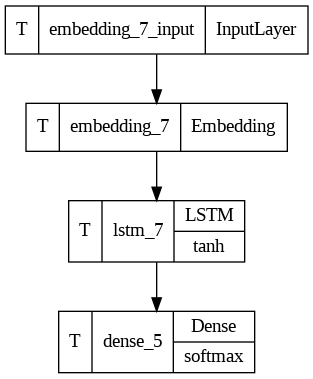

In [68]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_layer_activations=True, show_trainable=True)

In [69]:
model.fit(X,y,epochs=100)

Epoch 1/100
129/129 [==============================] - 60s 431ms/step - loss: 6.2938 - accuracy: 0.0361
Epoch 2/100
129/129 [==============================] - 57s 440ms/step - loss: 5.9168 - accuracy: 0.0414
Epoch 3/100
129/129 [==============================] - 63s 486ms/step - loss: 5.7830 - accuracy: 0.0444
Epoch 4/100
129/129 [==============================] - 55s 429ms/step - loss: 5.6264 - accuracy: 0.0458
Epoch 5/100
129/129 [==============================] - 57s 444ms/step - loss: 5.4126 - accuracy: 0.0553
Epoch 6/100
129/129 [==============================] - 56s 432ms/step - loss: 5.1457 - accuracy: 0.0819
Epoch 7/100
129/129 [==============================] - 56s 435ms/step - loss: 4.8591 - accuracy: 0.0982
Epoch 8/100
129/129 [==============================] - 56s 433ms/step - loss: 4.5556 - accuracy: 0.1156
Epoch 9/100
129/129 [==============================] - 57s 441ms/step - loss: 4.2394 - accuracy: 0.1441
Epoch 10/100
129/129 [==============================] - 57s 438m

In [82]:
import numpy as np
sample_text = "joey"

for i in range(15):

  token_text = tokenizer.texts_to_sequences([sample_text])[0]
  padded_text = pad_sequences([token_text], maxlen=max_len-1, padding='pre')
  pos = np.argmax(model.predict(padded_text))

  for key, value in tokenizer.word_index.items():
    if value == pos:
      sample_text = sample_text + " " + key
      print(sample_text)

1/1 [==============================] - 0s 84ms/step
joey i
1/1 [==============================] - 0s 126ms/step
joey i can't
1/1 [==============================] - 0s 96ms/step
joey i can't believe
1/1 [==============================] - 0s 112ms/step
joey i can't believe what
1/1 [==============================] - 0s 111ms/step
joey i can't believe what i'm
1/1 [==============================] - 0s 95ms/step
joey i can't believe what i'm hearing
1/1 [==============================] - 0s 94ms/step
joey i can't believe what i'm hearing here
1/1 [==============================] - 0s 104ms/step
joey i can't believe what i'm hearing here with
1/1 [==============================] - 0s 83ms/step
joey i can't believe what i'm hearing here with my
1/1 [==============================] - 0s 89ms/step
joey i can't believe what i'm hearing here with my entire
1/1 [==============================] - 0s 87ms/step
joey i can't believe what i'm hearing here with my entire life
1/1 [=====================

In [89]:
sample_text = "It is my"

for i in range(15):

  token_text = tokenizer.texts_to_sequences([sample_text])[0]
  padded_text = pad_sequences([token_text], maxlen=max_len-1, padding='pre')
  pos = np.argmax(model.predict(padded_text))

  for key, value in tokenizer.word_index.items():
    if value == pos:
      sample_text = sample_text + " " + key
      print(sample_text)

1/1 [==============================] - 0s 153ms/step
It is my image
1/1 [==============================] - 0s 112ms/step
It is my image she
1/1 [==============================] - 0s 89ms/step
It is my image she walked
1/1 [==============================] - 0s 93ms/step
It is my image she walked out
1/1 [==============================] - 0s 130ms/step
It is my image she walked out on
1/1 [==============================] - 0s 104ms/step
It is my image she walked out on me
1/1 [==============================] - 0s 85ms/step
It is my image she walked out on me i
1/1 [==============================] - 0s 89ms/step
It is my image she walked out on me i uh
1/1 [==============================] - 0s 84ms/step
It is my image she walked out on me i uh i
1/1 [==============================] - 0s 117ms/step
It is my image she walked out on me i uh i am
1/1 [==============================] - 0s 94ms/step
It is my image she walked out on me i uh i am i
1/1 [==============================] - 0s 89ms/s

In [80]:
sample_text = "Why did she "

for i in range(10):

  token_text = tokenizer.texts_to_sequences([sample_text])[0]
  padded_text = pad_sequences([token_text], maxlen=max_len-1, padding='pre')
  pos = np.argmax(model.predict(padded_text))

  for key, value in tokenizer.word_index.items():
    if value == pos:
      sample_text = sample_text + " " + key
      print(sample_text)

1/1 [==============================] - 0s 131ms/step
Why did she  make
1/1 [==============================] - 0s 137ms/step
Why did she  make it
1/1 [==============================] - 0s 178ms/step
Why did she  make it or
1/1 [==============================] - 0s 104ms/step
Why did she  make it or are
1/1 [==============================] - 0s 83ms/step
Why did she  make it or are you
1/1 [==============================] - 0s 139ms/step
Why did she  make it or are you just
1/1 [==============================] - 0s 84ms/step
Why did she  make it or are you just serving
1/1 [==============================] - 0s 108ms/step
Why did she  make it or are you just serving it
1/1 [==============================] - 0s 104ms/step
Why did she  make it or are you just serving it in
1/1 [==============================] - 0s 124ms/step
Why did she  make it or are you just serving it in a
